In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape:", X.shape)
X.head()


Shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [6]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear Kernel Accuracy: 0.956140350877193


In [7]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF Kernel Accuracy: 0.9736842105263158


In [8]:
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001]
}

grid = GridSearchCV(SVC(kernel='rbf'), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale'}
Best Score: 0.9736263736263737


In [9]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))



Best Model Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



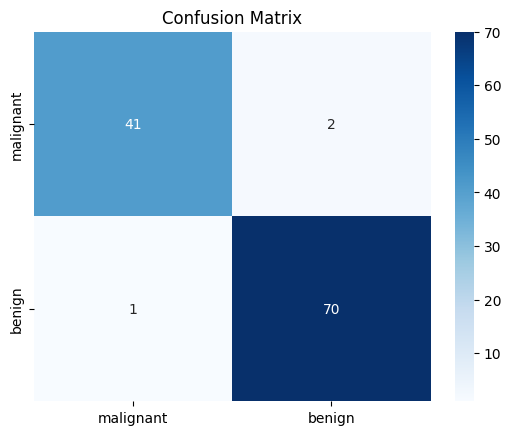

In [10]:
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)

plt.title("Confusion Matrix")
plt.show()


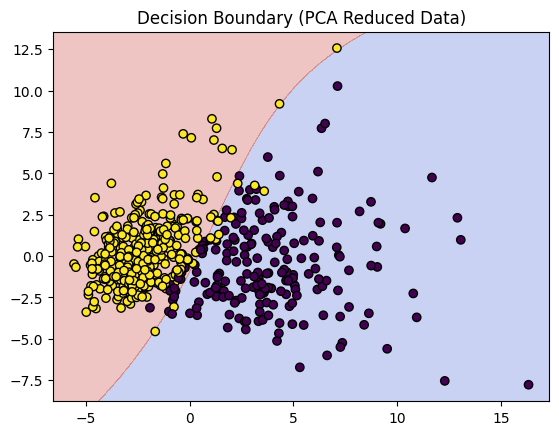

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

model_2d = SVC(kernel='rbf', C=1, gamma=0.01)
model_2d.fit(X_2d, y)

# plot
h = .02
x_min, x_max = X_2d[:,0].min() - 1, X_2d[:,0].max() + 1
y_min, y_max = X_2d[:,1].min() - 1, X_2d[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, edgecolors='k')
plt.title("Decision Boundary (PCA Reduced Data)")
plt.show()
